# Comprensión de comportamiento y patrones de pasajeros

Para la la nueva empresa de viajes compartidos Zuber se analizarán datos datos de viajes en taxi en 2017 con el propósito de comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

A continuación se enlistas los distintos apartados del reporte:
* 1 - Carga de archivo e inspección inicial de información
* 2 - Preparación de los datos
* 3 - Análisis de los datos
* 4 - Pruebas de hipótesis
* 5 - Conclusiones generales

## Carga de archivo e inspección inicial de información

Antes que nada se cargarán las librerías a ser utilizadas, posteriormente, se realizará la carga de los documentos donde se encuentran los datos a ser trabajados y se obtendrá la información de estos mismos para comenzar a tener una idea sobre cómo será necesario limpiar la información.

In [1]:
#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Importación de los archivos csv

company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
#Obtención de información referente a company_trips
company_trips.info()
company_trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


La descripción de las columnas de esta primera base sería la siguiente:
    
* company_name: nombre de la empresa de taxis
* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017

Los datos parecen estar limpios y completos, únicamente hará falta una sencilla revisión de los nombres de las compañías para confirmar que no contamos con duplicados por error de captura en el nombre de las compañías.

In [4]:
#Obtención de información referente a company_trips
dropoff_location_trips.info()
dropoff_location_trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


La descripción de las columnas de esta primera base sería la siguiente:
    
* dropoff_location_name: barrios de Chicago donde finalizaron los viajes
* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017

Los datos parecen estar limpios y completos, únicamente hará falta una sencilla revisión de los nombres de las compañías para confirmar que no contamos con duplicados por error de captura en el nombre de los destinos.

# 2  Preparación de los datos¶

Procederemos a revisar los valores únicos de las columnas mencionadas, para asegurarnos que no existen duplicados que se encuentren contaminando la información.

In [5]:
#Analizar valores únicos en columnas

print(sorted(company_trips['company_name'].unique()))
print()
print(sorted(dropoff_location_trips['dropoff_location_name'].unique()))

['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co', '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company', '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp', '24 Seven Taxi', '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.', '303 Taxi', '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.', '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express', '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson', '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa', '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc', '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.', '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.', '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp', 'American United', 'American United Taxi Affiliation', 'Blue Diamond', 'Blue Ribbon Taxi Association Inc.', 'Checker Taxi', 'Checker Taxi Affi

Podemos observar que la captura de los datos es correcta, con lo que podemos proceder al análisis.

# 3 Análisis de los datos

Procederemos a identificar los destinos más comunes para los viajeros, para lo cual utilizaremos la base de datos dropoff_location_trips.

In [6]:
top_10_drop_off = dropoff_location_trips.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='mean').sort_values('average_trips', ascending=False).reset_index().head(10)
print(top_10_drop_off)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<AxesSubplot:title={'center':'Viajes promedio por destino'}, xlabel='dropoff_location_name'>

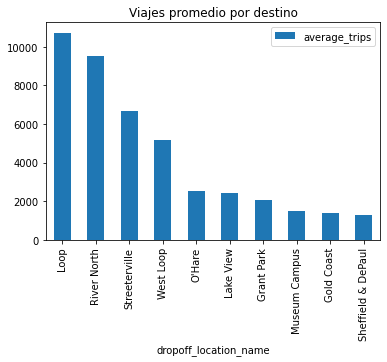

In [7]:
top_10_drop_off.plot(x='dropoff_location_name',
            kind='bar',
            stacked=False,
            title='Viajes promedio por destino')

Considerando que se trata únicamente de 10 de los 93 destinos posibles y la clara diferencia en la demanda que hay entre estos más solicitados, se puede llegar a la conclusión de que la mayor parte de los ingresos de la futura empresa va a provenir de unos pocos destinos, en especial considerando que se trata de transporte compartido, por lo que dos usuarios deben encontrarse buscando el mismo destino simultaneamente.

A continuación, procederemos a estudiar cuáles son las empresas que más viajes realizan con una gráfica donde nuevamente nos encontremos con las primeras 20, con el objetivo de observar claramente la distribución, sin sobrecargar de información con empresas pequeñas.

<AxesSubplot:title={'center':'Viajes por compañía'}, xlabel='company_name'>

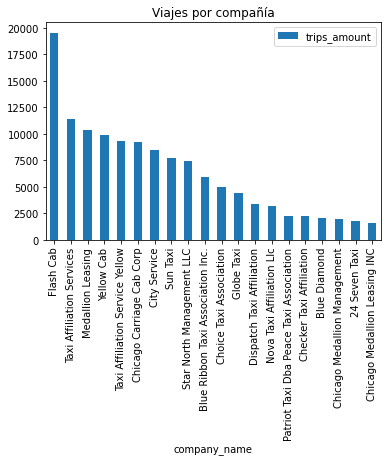

In [8]:
company_trips.head(20).plot(x='company_name',
            kind='bar',
            stacked=False,
            title='Viajes por compañía')

Gracias a la gráfica anterior podemos observar que se encuentra bastante escalonada la información sobre la distribución de viajes entre compañías, con Flash Cab en un primer lugar prácticamente duplicando los viajes de su competencia más proxima, mientas que a partir de "Choise Taxi Association" vuelve a ocurrir un desnivel significativo en los datos. Esto demuestra claramente los principales competidores y los números a los que la empresa debería estar aspirando para considerarse un competidor significativo.

# 4 Pruebas de hipótesis

A continuación probaremos las siguientes hipótesis:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Para esta prueba estaremos considerando la siguiente hipótesis nula:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos.

A esta hipótesis nula se llegó dado que es aquella que cuenta con una igualdad en su enunciado, provocando la siguiente hipótesis alternativa:

* La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Consideraremos en ambos casos un alpha, nivel de significancia, de 0.05, así como un análisis de dos colas ya que no se está estudiando ni valores sobre o por debajo de ningún otro, simplemente la diferencia.

In [9]:
#Primero obtengamos la base de información

loop_ohare_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [10]:
#Obtengamos los grupos de valores e identifiquemos a través de la prueba bartlett si las poblaciones son iguales.

good_weather = loop_ohare_trips.query('weather_conditions == "Good"')
bad_weather = loop_ohare_trips.query('weather_conditions == "Bad"')

stat, p = st.bartlett(good_weather.dropna()['duration_seconds'], bad_weather.dropna()['duration_seconds'])
p

0.3828627923388641

La prueba de Bartlett cuenta con la hipótesis nula de que las poblacioines son iguales, al no poder rechazarse (dado el alto nivel sobre alpha), consideraremos esta variable como cierta en el análisis de la hipóteis.

In [11]:
#Análicemos si se rechaza la hipótesis nula considerando nuestras variables

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

resultados = st.ttest_ind(good_weather.dropna()['duration_seconds'], bad_weather.dropna()['duration_seconds'],equal_var = True)


print('p-value: ', resultados.pvalue)

if resultados.pvalue < alpha:
     print("Rechazamos la hipótesis nula.")
else:
     print("No podemos rechazar la hipótesis nula.") 

p-value:  6.517970327099473e-12
Rechazamos la hipótesis nula.


En este caso encontramos que la hipótesis nula se rechaza, destacando una diferencia entre los tiempos de recorrido entre los dias con mal clima y aquellos con buen clima.

# 5 Conclusiones generales

La presente investigación de variables ha permitido entender más a fondo la naturaleza del negocio Zuber: Principales destinos, los principales competidores en el mercado y el impacto de los factores externos a los viajes.

En un principio se obtuvo información referente al clima, ya que no se contaba con esta, de una página de internet, lo cual se convirtió en una de nuestras principales bases de datos. Posteriormente a través de querys de SQL pudimos obtener información de bases de datos proporcionadas, con información valiosa referente a los viajes de taxis en 2017. La unión de esta información con la del clima terminó siendo determinante para el rechazo de la hipótesis nula, demostrando que existe un impacto considerable del clima sobre los viajes solicitados por los usuarios.

Por otro lado, se analizaron los principales destinos y la principal competencia a través de gráficas, que demostraron que existía una diferencia significativa tanto entre los destinos más cotizados contra el resto, en este caso Loop y River North teniendo una significativa popularidad. Mientras que del lado de la competencia Flash Cab destaca irrefutablemente, con casi el doble de viajes que su principal competidos.

Concluimos recomendando estudiar más a fondo las diferencias que hacen a Flash Cab destacar tanto sobre el resto de la compatencia, así como tomar en consideración las condiciones climáticas para promover el servicio cuando corresponda y no bajar los niveles de atención.